In [1]:
import tensorflow as tf
import matplotlib.pylab as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:80%]', 'train[80%:]'],
)
IMAGE_RES=224
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches      = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)



In [4]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))
feature_extractor.trainable = False
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(2)
])
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 6
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)


Epoch 1/6
582/582 [==============================] - 748s 1s/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 2/6
582/582 [==============================] - 744s 1s/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 3/6
582/582 [==============================] - 748s 1s/step - loss: 0.0258 - accuracy: 0.9911 - val_loss: 0.0301 - val_accuracy: 0.9901
Epoch 4/6
582/582 [==============================] - 749s 1s/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 5/6
582/582 [==============================] - 752s 1s/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 6/6
582/582 [==============================] - 760s 1s/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0323 - val_accuracy: 0.9897


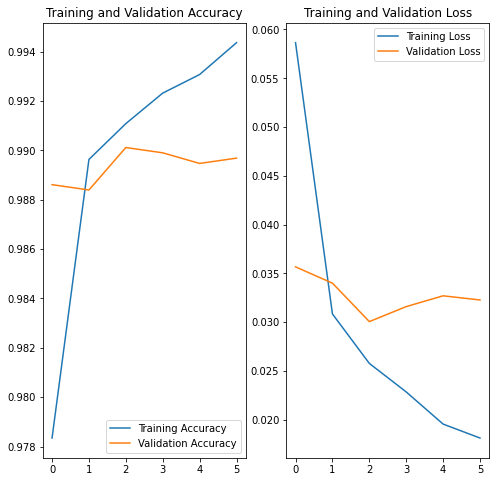

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()